In [ ]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/SIN/players_21.csv')
dataset.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [ ]:
rows = len(dataset.axes[0])
rows

18944

In [ ]:
subset=dataset[:1000]
clubs=subset['club_name']
nationality=subset['nationality']
merge=[]
for i in range(len(clubs)):
  merge.append({clubs[i],nationality[i]})

In [ ]:
adjacency_list=[[] for i in range (1000)]
for i in range(1000):
  for j in range(1000):
    if merge[i].intersection(merge[j]):
      adjacency_list[i].append(j)

In [ ]:
print(adjacency_list)

[[0, 7, 13, 22, 37, 39, 42, 45, 51, 52, 57, 67, 69, 80, 84, 100, 139, 142, 156, 159, 171, 179, 189, 197, 210, 216, 224, 225, 235, 257, 261, 301, 302, 311, 333, 355, 405, 440, 443, 474, 487, 519, 524, 551, 561, 575, 595, 601, 606, 620, 636, 662, 663, 683, 699, 703, 742, 762, 770, 777, 786, 787, 788, 802, 805, 811, 812, 814, 815, 829, 840, 872, 873, 908, 922, 927, 965, 974, 989], [1, 22, 30, 34, 35, 40, 64, 77, 88, 95, 103, 116, 126, 128, 134, 158, 159, 161, 169, 208, 215, 239, 252, 260, 272, 279, 281, 313, 317, 329, 335, 374, 404, 409, 414, 428, 432, 471, 484, 520, 533, 542, 585, 587, 588, 592, 612, 643, 653, 683, 685, 698, 710, 721, 739, 740, 758, 775, 797, 836, 859, 876, 906, 923, 938, 963, 991], [2, 23, 96, 109, 112, 117, 136, 138, 184, 224, 227, 232, 265, 272, 282, 288, 310, 319, 338, 352, 411, 449, 483, 646, 780], [3, 16, 20, 40, 58, 66, 76, 102, 104, 108, 132, 214, 249, 273, 294, 299, 322, 328, 402, 406, 444, 475, 624, 726, 924], [4, 6, 9, 17, 18, 32, 39, 44, 47, 50, 68, 80, 82, 9

In [ ]:
id_to_name={}
counter=0
for i in subset['short_name']:
  id_to_name[counter]=i
  counter+=1
name_to_id={}
counter=0
for i in subset['short_name']:
  name_to_id[i]=counter
  counter+=1

In [ ]:
from typing import List
from collections import deque
import sys
 

def printpath(path: List[int]) :
     
    size = len(path)
    for i in range(size):
        if(i==size-1):
            print(id_to_name[path[i]])
        else:
            print(id_to_name[path[i]], end = " ---- ")
            print(merge[path[i]].intersection(merge[path[i+1]]),end=" ---- ")
         
    print()
 

def isNotVisited(x: int, path: List[int]):
 
    size = len(path)
    for i in range(size):
        if (path[i] == x):
            return 0
             
    return 1
 

def findpaths(g: List[List[int]], src: int, dst: int, v: int):
                   
    q = deque()
    gc=0
    
    # Path array to store the current path
    path = []
    path.append(src)
    q.append(path.copy())
     
    while q:
        path = q.popleft()
        last = path[len(path) - 1]
 
        # If last vertex is the desired destination
        # then print the path
        if (last == dst and gc<3):
            printpath(path)
            gc+=1
            if(gc==3):
              return
 
        #Add neighbours at same level
        for i in range(len(g[last])):
            if (isNotVisited(g[last][i], path)):
                newpath = path.copy()
                newpath.append(g[last][i])
                q.append(newpath)

In [ ]:
findpaths(adjacency_list, name_to_id['L. Messi'], name_to_id['Cristiano Ronaldo'], 1000)

L. Messi ---- {'Argentina'} ---- P. Dybala ---- {'Juventus'} ---- Cristiano Ronaldo

L. Messi ---- {'FC Barcelona'} ---- Nélson Semedo ---- {'Portugal'} ---- Cristiano Ronaldo

L. Messi ---- {'FC Barcelona'} ---- Trincão ---- {'Portugal'} ---- Cristiano Ronaldo



In [ ]:
findpaths(adjacency_list, name_to_id['H. Kane'], name_to_id['R. Sterling'], 1000)

H. Kane ---- {'England'} ---- R. Sterling

H. Kane ---- {'England'} ---- J. Sancho ---- {'England'} ---- R. Sterling

H. Kane ---- {'England'} ---- T. Alexander-Arnold ---- {'England'} ---- R. Sterling



In [ ]:
import queue
def minSeparation(edges, u, v, n):
     
    # Keeping track of visited nodes
    visited = [0] * n 
 
    # Initialize distances as 0 
    distance = [0] * n

    #Path
    path=[]
 
    # queue to do BFS. 
    Q = queue.Queue()
    distance[u] = 0. #Since its the source
 
    Q.put(u)  #Enqueue
    path.append(u)
    visited[u] = True
    while (not Q.empty()):
        x = Q.get() #Dequeue
         
        for i in range(len(edges[x])):
            if (visited[edges[x][i]]):  #Skip if visited already
                continue
            
 
            # update distance for i 
            distance[edges[x][i]] = distance[x] + 1
            Q.put(edges[x][i])   #Add neighbours at same level
            visited[edges[x][i]] = 1
    return distance[v]

In [ ]:
minSeparation(adjacency_list,name_to_id['L. Messi'],name_to_id['Cristiano Ronaldo'],1000)

2.0

In [ ]:
import numpy as np
import networkx as nx
from networkx.algorithms import approximation
Connection_Graph=np.zeros((subset.shape[0],subset.shape[0]))
for i in range(Connection_Graph.shape[0]):
  for j in range(Connection_Graph.shape[0]):
    if merge[i].intersection(merge[j]):
      Connection_Graph[i][j]=1

In [ ]:
npmatrix=np.array(Connection_Graph)
G = nx.from_numpy_array(npmatrix)
G.number_of_edges()

35498

In [ ]:
#Degree centrality
dc=nx.algorithms.centrality.degree_centrality(G)
max=dc[0]
maxindex=0
for i in dc:
  if dc[i]>max:
    max=dc[i]
    maxindex=i
print(id_to_name[maxindex])

Thiago


In [ ]:
#Closeness Centrality
cc=nx.algorithms.centrality.closeness_centrality(G)
maxcc=0
maxindexcc=0
for i in cc:
  if cc[i]>maxcc:
    maxcc=cc[i]
    maxindexcc=i
print(id_to_name[maxindexcc])

Rodri


In [ ]:
#Betweenness Centrality
bc=nx.algorithms.centrality.betweenness_centrality(G)
maxbc=bc[0]
maxindexbc=0
for i in bc:
  if bc[i]>maxbc:
    maxcc=bc[i]
    maxindexbc=i
print(id_to_name[maxindexbc])

E. Palacios


In [ ]:
#Optimised DOS
import time
t1=time.time()
ds=nx.algorithms.shortest_paths.generic.average_shortest_path_length(G)
print("The degree of separation on average between any two footballers is "+str(ds))
print("The time taken was "+str(time.time()-t1))

The degree of separation on average between any two footballers is 2.502282282282282
The time taken was 3.3825364112854004


Louvain method, which is a popular community detection algorithm


In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv

edges = []

# Iterate over the rows in the adjacency list
for row in adjacency_list:
    # Iterate over the columns in the row
    for col in row[1:]:
        # Append the edge to the edges list
        edges.append([row[0], col])

# Write the edges to a CSV file
with open('edge_list.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Source', 'Target'])
    writer.writerows(edges)

In [ ]:
edge_list = pd.read_csv('/content/edge_list.csv')

# Create an empty graph
G = nx.Graph()

# Add the edges to the graph
for i, row in edge_list.iterrows():
    G.add_edge(row['Source'], row['Target'])

In [ ]:
import community.community_louvain as community_louvain

# Perform community detection using the Louvain method
partition = community_louvain.best_partition(G)

# Print the number of communities found
num_communities = len(set(partition.values()))
print(f"Number of communities: {num_communities}")

Number of communities: 8


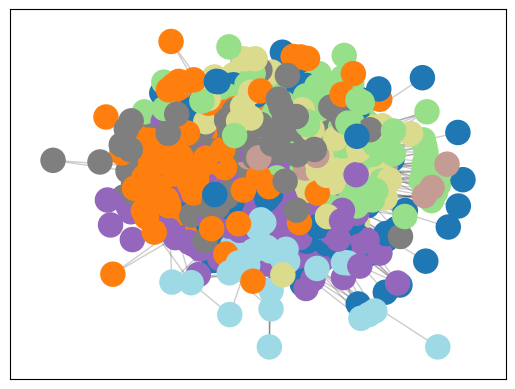

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of node positions
pos = nx.spring_layout(G)

# Create a list of community assignments for each node
node_colors = [partition[n] for n in G.nodes()]

# Draw the nodes in the graph, colored by community
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20)

# Draw the edges in the graph
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Show the plot
plt.show()

In [ ]:
def find_clusters(edge_list):
    clusters = []
    visited = set()

    def dfs(node, cluster):
        visited.add(node)
        cluster.add(node)
        for neighbor in edge_list[node]:
            if neighbor not in visited:
                dfs(neighbor, cluster)

    for node in range(len(edge_list)):
        if node not in visited:
            cluster = set()
            dfs(node, cluster)
            clusters.append(cluster)

    return clusters

In [ ]:
clusters = find_clusters(adjacency_list)
print(clusters)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        xroot, yroot = self.find(x), self.find(y)
        if xroot == yroot:
            return
        if self.rank[xroot] < self.rank[yroot]:
            xroot, yroot = yroot, xroot
        self.parent[yroot] = xroot
        if self.rank[xroot] == self.rank[yroot]:
            self.rank[xroot] += 1

def find_clusters(edge_list):
    n = len(edge_list)
    uf = UnionFind(n)
    for i in range(n):
        for j in edge_list[i]:
            uf.union(i, j)
    clusters = {}
    for i in range(n):
        root = uf.find(i)
        if root not in clusters:
            clusters[root] = set()
        clusters[root].add(i)
    return list(clusters.values())

In [ ]:
clusters = find_clusters(adjacency_list)
print(clusters)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

Nationality Diversity

In [ ]:
club_groups = dataset.groupby('club_name')

In [ ]:
def diversity(name):
    for club_name, group in club_groups:
        if name == club_name:
            nationality_counts = group['nationality'].value_counts()
            nationality_diversity = nationality_counts.div(nationality_counts.sum())
            nationality_diversity.plot(kind='bar', title=club_name)
            print(club_name,"\n",nationality_diversity)
            print("\n")
            plt.show()
            break

FC Barcelona 
 Spain                 0.303030
Brazil                0.181818
France                0.151515
Uruguay               0.060606
Netherlands           0.060606
Portugal              0.060606
Argentina             0.030303
Germany               0.030303
Bosnia Herzegovina    0.030303
Denmark               0.030303
Japan                 0.030303
Albania               0.030303
Name: nationality, dtype: float64




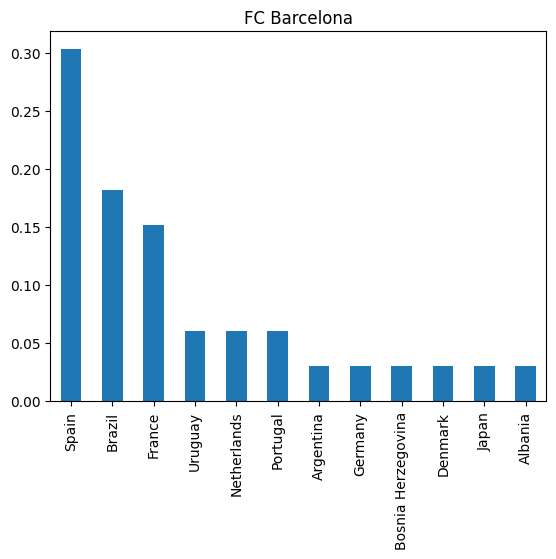

In [ ]:
diversity('FC Barcelona')

Manchester City 
 England          0.303030
Spain            0.151515
Brazil           0.090909
France           0.090909
Argentina        0.060606
Portugal         0.060606
Netherlands      0.060606
Belgium          0.030303
Algeria          0.030303
Germany          0.030303
Ukraine          0.030303
United States    0.030303
Wales            0.030303
Name: nationality, dtype: float64




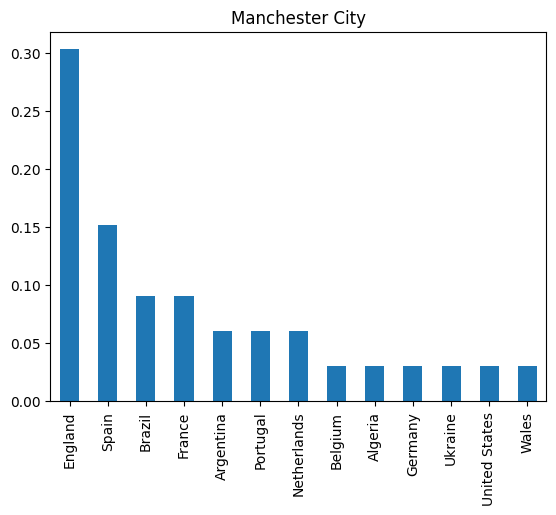

In [ ]:
diversity('Manchester City')